# Assignment-Time Series Analysis
Due on Oct. 24th

Please retrieve daily closing stock price of AT&T using `yahoo finance`. Then, do the following tasks:
    
Question 1. Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data. (20 pts)

Question 2. Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary.(20 pts)

Question 3. If the series is not stationary, please make it stationary.(20 pts)

Question 4. Model the series using moving average and autoregressive model with an optimum lag.(20 pts)

Questions 5. Visualize the result using train, test data and forecast in a single plot and calculate the predictive performance using RMSE metric.(20 pts)

In [1]:
# codes here
!pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
stocks = ['T']
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 1, 1)
stock_price = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04 00:00:00-05:00,22.197886,22.273415,21.918428,22.235649,18.810328,86700816
2021-01-05 00:00:00-05:00,22.280968,22.469790,22.046827,22.099697,18.695318,83054520
2021-01-06 00:00:00-05:00,22.212992,22.658609,22.182779,22.530210,19.059511,73455520
2021-01-07 00:00:00-05:00,22.673716,22.726585,22.416918,22.590633,19.110628,71265359
2021-01-08 00:00:00-05:00,22.009064,22.061934,21.714502,21.918428,18.978834,72471656
...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,18.783989,18.950151,18.602718,18.716011,17.418028,67853676
2021-12-28 00:00:00-05:00,18.685801,18.972811,18.648035,18.746223,17.446142,55695649
2021-12-29 00:00:00-05:00,18.738670,18.821753,18.580059,18.610271,17.319620,44728560


In [5]:
stock_price = stock_price['Close']

In [6]:
stock_price.head()

Date
2021-01-04 00:00:00-05:00    22.235649
2021-01-05 00:00:00-05:00    22.099697
2021-01-06 00:00:00-05:00    22.530210
2021-01-07 00:00:00-05:00    22.590633
2021-01-08 00:00:00-05:00    21.918428
Name: Close, dtype: float64

## Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data. (20 pts)

In [7]:
stock_price.describe()

count    252.000000
mean      21.121301
std        1.708943
min       16.744713
25%       20.447508
50%       21.499245
75%       22.250755
max       24.645016
Name: Close, dtype: float64

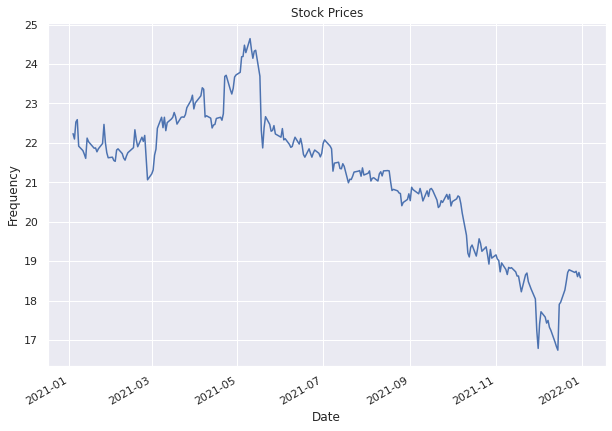

In [8]:
fig, ax = plt.subplots(figsize = (10 , 7))
stock_price.plot(ax = ax)
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

### By Observing the data plot we can say the there are Noticiable trends and changinglevels can be seen

## Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary.(20 pts)

## ADF

In [9]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(stock_price)
print('The statistic value is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The statistic value is -0.8143213665999641 and p-value is 0.8148790355148237


The Time series of AT&T Stock is non-stationary as the P-value is higher than 0.05.

## ACF - Auto correlation Function

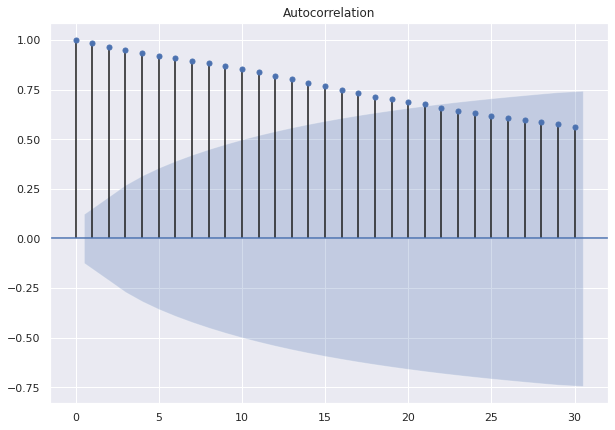

In [10]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize = (10 , 7))
sm.graphics.tsa.plot_acf(stock_price, lags=30,ax =ax);

Auto correlation Function plot indicates that gradual decrece in bars this indicates that the data is non stationary and the bars in the blue shade region which is confidence interval which indicates that there is no correlation between the lag and data

## PACF - Partial Auto Correlation

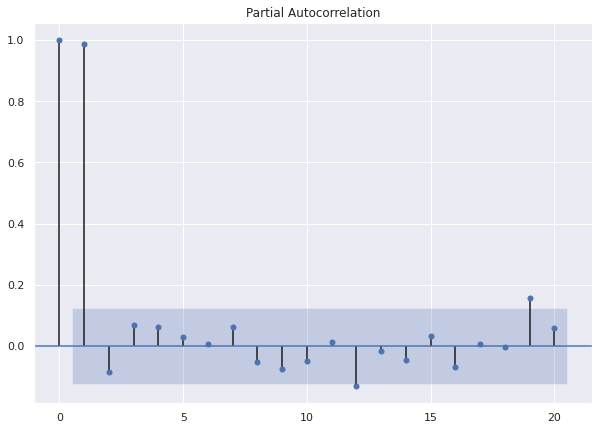

In [11]:
fig, ax = plt.subplots(figsize = (10 , 7))
sm.graphics.tsa.plot_pacf(stock_price, lags=20,ax =ax);

## Question 3. If the series is not stationary, please make it stationary.(20 pts)

## Differencing

In [12]:
stock_price = stock_price.diff()

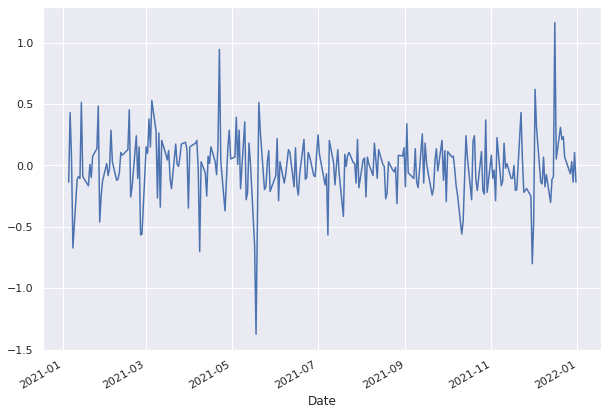

In [13]:
fig, ax = plt.subplots(figsize = (10 , 7))
stock_price = stock_price.dropna()
stock_price.plot(ax = ax)

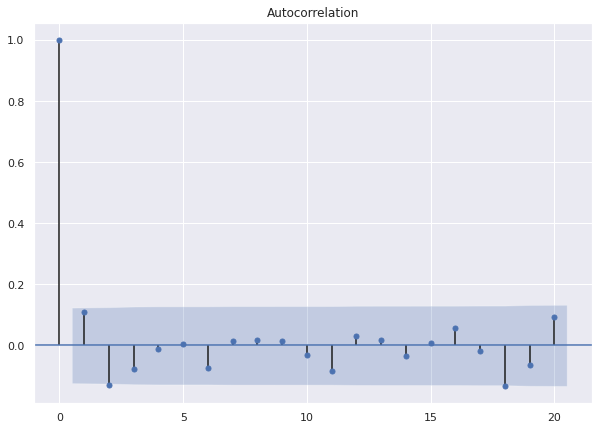

In [15]:
fig, ax = plt.subplots(figsize = (10 , 7))
sm.graphics.tsa.plot_acf(stock_price, lags=20,ax =ax);

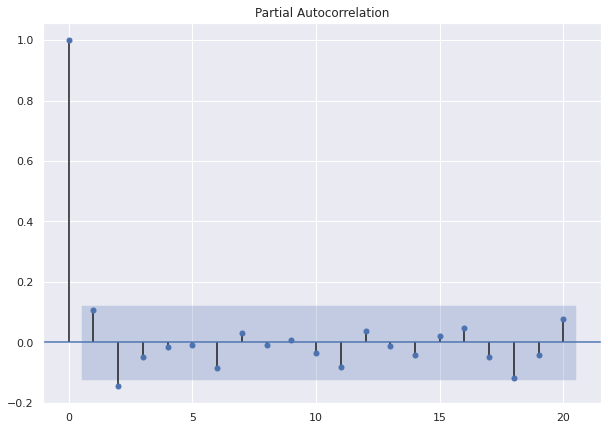

In [14]:
fig, ax = plt.subplots(figsize = (10 , 7))
sm.graphics.tsa.plot_pacf(stock_price, lags=20,ax =ax);

## Question 4. Model the series using moving average and autoregressive model with an optimum lag.(20 pts)
## Questions 5. Visualize the result using train, test data and forecast in a single plot and calculate the predictive performance using RMSE metric.(20 pts)

## Moving average Model

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
ma_model = ARIMA(stock_price, order=(0, 0, 18))
ma_result = ma_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [18]:
train_len = int(len(stock_price) * 0.18)
dtrain = stock_price[:train_len]
dtest  = stock_price[train_len:]

In [19]:
start = len(dtrain)
end = len(dtrain) + len(dtest) - 1

In [20]:
ma_pred = ma_result.predict(start, end)
ma_pred.index = dtest.index

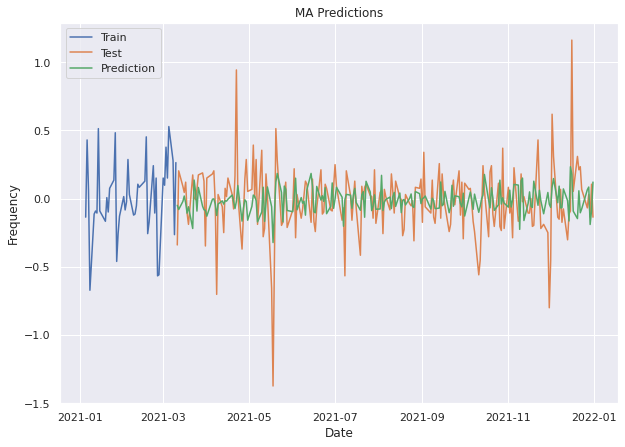

In [21]:
fig, ax = plt.subplots(figsize = (10 , 7))
plt.plot(dtrain.index,dtrain, label = 'Train')
plt.plot(dtest.index,dtest, label = 'Test')
plt.plot(ma_pred.index,ma_pred, label = 'Prediction')
plt.title("MA Predictions")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mae = mean_absolute_error(dtest, ma_pred)
mse = mean_squared_error(dtest, ma_pred)
rmse = np.sqrt(mean_squared_error(dtest, ma_pred))

In [24]:
print("Predictive Performance of \nMAE = {}  \nMSE = {} \nRMSE ={} ".format(mae ,mse, rmse))

Predictive Performance of 
MAE = 0.17961728278736144  
MSE = 0.05893047502313894 
RMSE =0.24275599894366964 


In [25]:
forecast_index = pd.date_range(dtest.index[-1], periods=10)

In [26]:
ma_forecast = ma_result.forecast(steps=10)
ma_forecast.index = forecast_index

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


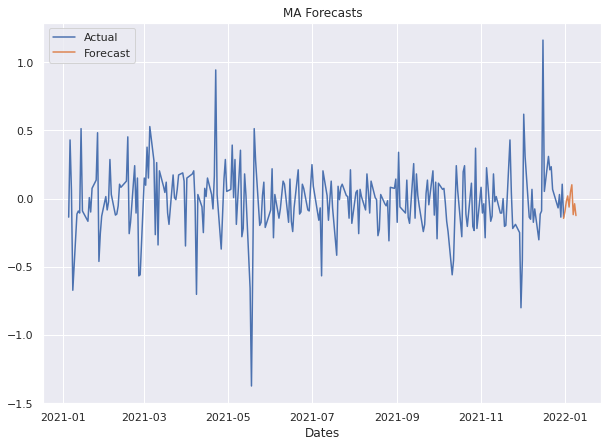

In [27]:
fig, ax = plt.subplots(figsize = (10 , 7))
plt.plot(stock_price.index, stock_price, label='Actual')
plt.plot(ma_forecast.index, ma_forecast, label='Forecast')
plt.legend()
plt.title('MA Forecasts')
plt.xlabel('Dates')
plt.show()

## Autoregressive model

In [28]:
arm_model = ARIMA(stock_price, order=(18, 0, 0))
arm_result = arm_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [29]:
train_lenarm = int(len(stock_price) * 0.18)
dtrain_arm = stock_price[:train_lenarm]
dtest_arm  = stock_price[train_lenarm:]

In [30]:
start = len(dtrain_arm)
end = len(dtrain_arm) + len(dtest_arm) - 1

In [31]:
arm_pred = arm_result.predict(start, end)
arm_pred.index = dtest_arm.index

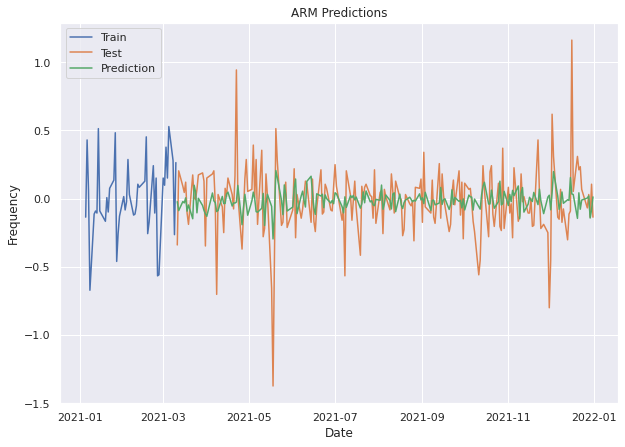

In [32]:
fig, ax = plt.subplots(figsize = (10 , 7))
plt.plot(dtrain_arm.index,dtrain_arm, label = 'Train')
plt.plot(dtest_arm.index,dtest_arm, label = 'Test')
plt.plot(arm_pred.index,arm_pred, label = 'Prediction')
plt.title("ARM Predictions")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [33]:
forecast_indexarm = pd.date_range(dtest_arm.index[-1], periods=10)

In [34]:
arm_forecast = arm_result.forecast(steps=10)
arm_forecast.index = forecast_indexarm

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


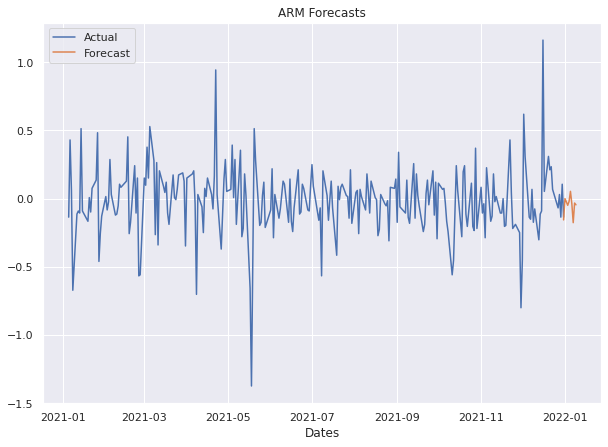

In [35]:
fig, ax = plt.subplots(figsize = (10 , 7))
plt.plot(stock_price.index, stock_price, label='Actual')
plt.plot(arm_forecast.index, arm_forecast, label='Forecast')
plt.legend()
plt.title('ARM Forecasts')
plt.xlabel('Dates')
plt.show()

In [36]:
mae_arm = mean_absolute_error(dtest_arm, arm_pred)
mse_arm = mean_squared_error(dtest_arm, arm_pred)
rmse_arm = np.sqrt(mean_squared_error(dtest_arm, arm_pred))
print("Predictive Performance of Autoregressive model is \nMAE = {}  \nMSE = {} \nRMSE ={} ".format(mae_arm ,mse_arm, rmse_arm))

Predictive Performance of Autoregressive model is 
MAE = 0.17418951950441966  
MSE = 0.05921088785915965 
RMSE =0.24333287459601435 
